# Separation of Previous Code into Environment and Agent Codes

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import gym
import sys
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker
import Gridworld_Env, Q_Learning_Agent

world = Gridworld_Env.gridworld()
agent = Q_Learning_Agent.qLearning(world,'')#'render' with quotes to show environment
agent.work()

## Before Using PyTorch
The neural network model uses array-style inputs and outputs, so I have to change my Q function from it's original form in Q_Learning_Agent to an arrayed form in Q_Learning_Agent_Arrayed.

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import gym
import sys
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker
import Gridworld_Env, Q_Learning_Agent_Arrayed

world = Gridworld_Env.gridworld()
agent = Q_Learning_Agent_Arrayed.qLearning(world,'')#'render' with quotes to show environment
agent.work()

# Getting Used to PyTorch
The below code seems to work, now making it into a class file. Code from https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [ ]:
# -*- coding: utf-8 -*-
import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 49, 100, 4

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.MSELoss()

learning_rate = 1e-4
for t in range(1000):
    y_pred = model(x)#prediction step is called forward pass

    loss = loss_fn(y_pred, y)#loss calculation for feedback
    print(t, loss.item())

    loss.backward()#gradient of loss step is called backward pass

    with torch.no_grad():# Update the weights using gradient descent.
        for param in model.parameters():
            param -= learning_rate * param.grad

# Implementation of Deep Q-Learning Agent in Gridworld Environment
## Steps for implementation
* Weights initialized 
### Looping
* NN "forward pass" (prediction of Q function) is sent to Agent
* Agent makes decision and observes reward. The reward is sent back to NN along with the currently used Q function
* Send Current Q function estimate for the agent's exploiting policy action (regardless if agent performs action) and newly observed reward to NN class file
* Agent reperforms "forward pass" (prediction of Q function) to facilitate the calculation of loss with respect to the received Q function estimate for agent's exploit action and the observed reward
* Repeat but without weight initialization

## Progress
### Done
* Weights already randomly initialized using above code
### Need to Do
* Forward pass sent to agent
 * Need to include NN in agent's __init__ to enable receiving forward pass output for actions related to agent's state

done


<IPython.core.display.Javascript object>


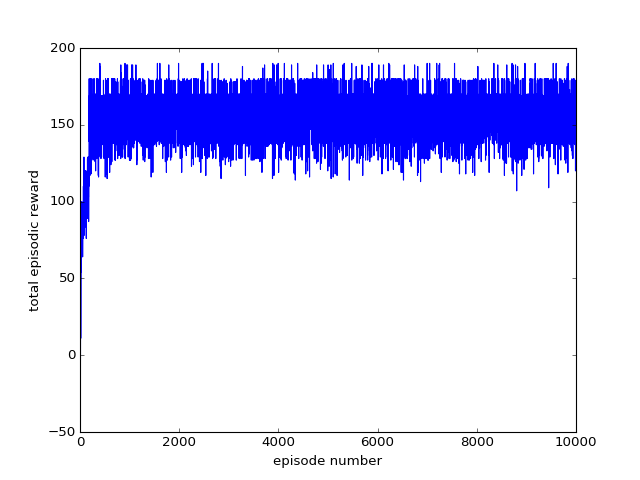

reward model
[[ 0. 10.  0.  5.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
Q function for up action
[[18.00006416 22.45959765 13.77311167 15.62459956  1.73165547]
 [17.48880647 20.03285081 14.46217585 15.25796746 14.17171533]
 [15.98318463 17.88236642 15.56907662 13.44084671  2.98923019]
 [14.37769162 15.44248409 14.03996757 12.14422195  4.09199211]
 [12.54318297 13.98210691 12.50947586 10.90912353  9.28673062]]
Q function for down action
[[16.46778747 22.29681468 15.86719583 16.83440627  1.5747359 ]
 [14.45532168 15.89539784 14.16661407 12.6587601   3.00412544]
 [12.87549248 14.31836011 12.92812316 11.198354    3.81071886]
 [11.44549906 12.54168148 11.79317632 10.01729917  1.96420553]
 [11.49164372 12.43131203 11.07510155  6.1709309   0.16628197]]
Q function for left action
[[17.99625416 22.29201911 14.89291522 17.4036449  15.73940521]
 [15.93420175 16.02428002 17.62765484 15.70338909  3.7997878 ]
 [14.30629372 14.31141963 15.33732

<IPython.core.display.Javascript object>


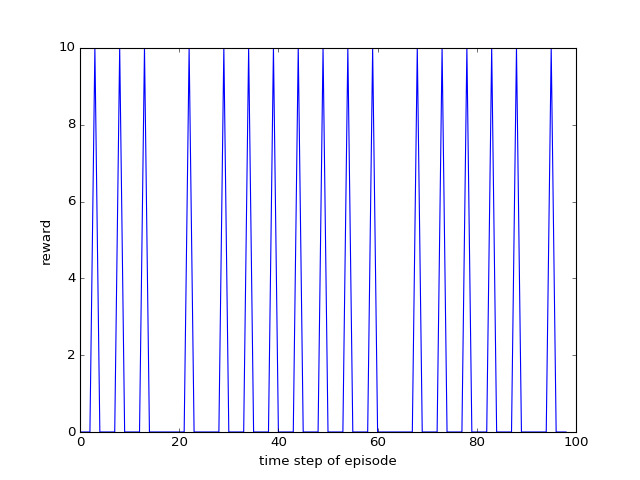

<IPython.core.display.Javascript object>


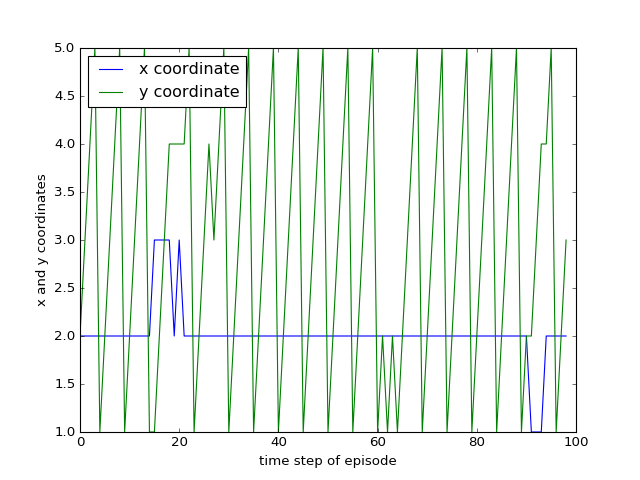

Exploit policy of agent, where: 1 is up, 2 is down, 3 is left and 4 is right
[[4 1 2 3 3]
 [4 1 3 3 1]
 [1 1 1 3 3]
 [1 1 1 1 3]
 [1 1 1 1 1]]


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import gym
import sys
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker
import Gridworld_Env, Q_Learning_Agent_nn

world = Gridworld_Env.gridworld()
agent = Q_Learning_Agent_nn.qLearning(world,'','')#'render' with quotes to show environment
agent.work()